## Final Project Submission

Please fill out:
* Student name: Jiarong Chen
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Rafacarrasco
* Blog post URL: 
* Video post URL: https://youtu.be/XeUthfAOI2k

In [1]:
# Your code here - remember to use markdown cells for comments as well!


# Input some libraries and dataset

In [2]:
#import libraries
import numpy as np
from pandas import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [3]:
#Read dataset
df_basics = pd.read_csv('zippedData/imdb.title.basics.csv')
df_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv')
df_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
df_budget = pd.read_csv('zippedData/tn.movie_budgets.csv')

# Preview the dataset

In [4]:
df_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
df_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [7]:
df_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [11]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Business problem

Business Problem
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with exploring what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# My questions and my plan

1. Best Genre
    * A best genre in Highest Mean Rating 
    * A best genre in Highest Total Gross(two resources)
    * Comparing and Summary
2. Budget vs Total Grosses
    * Are budgets and total grosses connected?
    * Which genre has the strongest relationship between budgets and total grosses?
    * Which genre has the highest revenue(with budget information)?
3. Best Runtime 
    * Find the most runtime range from top rating movies 
    * Find the most runtime range from top revenue movies
    * Comparing and Summary

I will tell the company which genre, which budget and which runtime will be best for a movie with an expected revenue.

# Data Cleaning

### Clean df_basics

In [12]:
#Check whole duplicate values
df_basics[df_basics.duplicated()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [13]:
#A function to check duplicate values of each columns  
def check_duplicate(df):
    duplicate = []
    for i in df.columns:
        if len(df[i].unique()) != len(df):
            duplicate.append(i)
    return duplicate

In [14]:
check_duplicate(df_basics)

['primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']

These columns are having duplicate values. 'start_year', 'runtime_minutes', 'genres' are common with duplicate values. I will check 'primary_title', 'original_title' deeper below.

In [15]:
df_basics[df_basics['primary_title'].duplicated()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
706,tt10022974,Nemesis,Nemesis,2019,NaN,"Action,Thriller"
948,tt10064536,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action
949,tt10064558,Untitled Marvel Film,Untitled Marvel Film,2021,NaN,Action
1478,tt10127292,Plushtubers: The Apocalypse,Plushtubers: The Apocalypse,2019,NaN,"Action,Adventure"
1622,tt10148772,Indemnity,Indemnity,2018,45.0,Thriller
...,...,...,...,...,...,...
146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller"
146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama"
146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary


## Data Inconstency
Some movies with duplicate title have different start_years, genres or  runtime_minutes. This may cause outliers in the data

In [16]:
# different runtimes/genres and start years
df_basics[df_basics['primary_title']=='Nemesis']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
280,tt0800353,Nemesis,Nemesis,2010,83.0,Drama
706,tt10022974,Nemesis,Nemesis,2019,NaN,"Action,Thriller"
136440,tt8695086,Nemesis,Nemesis,2019,78.0,Thriller


In [17]:
# 3 rows with same values 
df_basics[df_basics['primary_title']=='Untitled Disney Marvel Film']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
821,tt10042446,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action
948,tt10064536,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action
130616,tt8097016,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action


In [18]:
#All movies with duplicate title, start_year, runtime_munutes and genres
df_basics[df_basics.duplicated(subset=['primary_title','original_title', 'start_year', 
                                       'runtime_minutes', 'genres'])]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
948,tt10064536,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action
949,tt10064558,Untitled Marvel Film,Untitled Marvel Film,2021,NaN,Action
1478,tt10127292,Plushtubers: The Apocalypse,Plushtubers: The Apocalypse,2019,NaN,"Action,Adventure"
2231,tt10224422,Olanda,Olanda,2019,154.0,Documentary
2286,tt10230042,Rok Sako To Rok Lo,Rok Sako To Rok Lo,2018,NaN,Comedy
...,...,...,...,...,...,...
144016,tt9616952,View from the Past,View from the Past,2019,NaN,Sci-Fi
144392,tt9660588,3. Elma,3. Elma,2014,65.0,Drama
144622,tt9688944,Um fio de esperança: independência ou guerra n...,Um fio de esperança: independência ou guerra n...,2017,94.0,Documentary
145118,tt9773302,3. Elma,3. Elma,2014,65.0,Drama


In [19]:
#Drop those movies with duplicate tittle, start_year, runtime_munutes and genres
df_basics.drop_duplicates(subset=['primary_title','original_title', 'start_year', 
                                       'runtime_minutes', 'genres'], inplace=True)
len(df_basics)

146022

### Check na values

In [20]:
def check_na(df):
    return df.isna().sum(axis=0)*100/df_basics.shape[0]

In [21]:
check_na(df_basics)

tconst              0.000000
primary_title       0.000000
original_title      0.014381
start_year          0.000000
runtime_minutes    21.695361
genres              3.694649
dtype: float64

In [22]:
#Not a high percentile of na value, choose to all drop them and check the shape again
df_basics.dropna(inplace=True)
df_basics.shape

(112173, 6)

### Check erroneous values

In [23]:
#For start year, the valid area set to (1000,2020)
(min(df_basics['start_year']), max(df_basics['start_year']))

(2010, 2022)

Obviously, the maximum value 2022 is not a vaild value

In [24]:
drop_index = df_basics[df_basics['start_year'] > 2020].index

In [25]:
#drop those invaild values and double check
df_basics.drop(drop_index, inplace=True)
(min(df_basics['start_year']), max(df_basics['start_year']))

(2010, 2020)

In [26]:
#Double check the df size
df_basics.shape

(112166, 6)

In [27]:
#Now for the runtime_minutes, the valid area set to (0,650). 
#PS: The longest time of a movie is 643 minutes via Google.
(min(df_basics['runtime_minutes']), max(df_basics['runtime_minutes']))

(1.0, 51420.0)

In [28]:
#Here, one minute maybe a placeholder. Let's check them
df_basics[df_basics['runtime_minutes'] == 1]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
2570,tt10265824,Lamentation For Little Girls Who Are In Love W...,Lamentation For Little Girls Who Are In Love W...,2019,1.0,Animation
3298,tt10326116,Happy New Year,Happy New Year,2019,1.0,Animation
22903,tt1935926,Tierra,Tierra,2010,1.0,"Documentary,Family"
54307,tt3194766,Guerreiros da paz e poesia: It All Depends on Us,Guerreiros da paz e poesia: It All Depends on Us,2013,1.0,"Documentary,Music"
57140,tt3331660,Shark Sanctuary,Shark Sanctuary,2012,1.0,"Adventure,Documentary"
60809,tt3515578,November,November,2014,1.0,"Documentary,History"
72190,tt4122866,Powered By Green Smoothies,Powered By Green Smoothies,2014,1.0,"Adventure,Documentary,Sport"
93214,tt5430316,Great Valley Nature Center Documentary,Great Valley Nature Center Documentary,2015,1.0,Documentary
95787,tt5589268,A Serendipitous Exploration,A Serendipitous Exploration,2016,1.0,Documentary
98755,tt5773518,Isa One Minute Portrait,Isa One Minute Portrait,2016,1.0,Documentary


Form movies' titles, such as 'Isa One Minute Portrait', 'One Minute Of Resistance', they look resonable here.

In [29]:
drop_index = df_basics[df_basics['runtime_minutes'] > 650].index

In [30]:
#drop those invaild values and double check
df_basics.drop(drop_index, inplace=True)
(min(df_basics['runtime_minutes']), max(df_basics['runtime_minutes']))

(1.0, 623.0)

In [31]:
#Double check the df size
df_basics.shape

(112123, 6)

### Normalization the genres columns
In genres columns, some movies have one type, but some have two or more types. I am going to divide it into another table

In [32]:
#Make a list to store genres and will be use as columns
list_genres = []
for n in [0,1,2]:
    for i in df_basics.genres.str.split(pat=',', expand=True)[n].unique():
        if i not in list_genres:
            list_genres.append(i)

In [33]:
#Drop the None value and sort it
list_genres.pop()
list_genres.sort()
len(list_genres)

27

In [34]:
#Make it into a df and preview
df_genres = pd.DataFrame(columns=list_genres, index=df_basics['tconst'])
df_genres.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
tconst,,,,,,,,,,,,,,,,,,,,,
tt0063540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt0066787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt0069049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt0100275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt0111414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#Reset the index of df_basics for further using and preview
df_basics.reset_index(inplace=True)
df_basics.head()

,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
4,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


In [36]:
#Split the items under genres columns for further using
df_basics['genres'] = df_basics['genres'].map(lambda x: x.split(','))

In [37]:
#Set the value to 1 if the genres match the movie
for i in range(len(df_basics)):
    for n in df_basics['genres'][i]:
        for m in df_genres.columns:
            if m == n:
                df_genres[m][i] = 1

In [38]:
#Fill in other None value with 0 and preview
df_genres.fillna(0, inplace=True)
df_genres.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
tconst,,,,,,,,,,,,,,,,,,,,,
tt0063540,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
tt0066787,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
tt0069049,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
tt0100275,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
tt0111414,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Clean df_rating

In [39]:
df_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [40]:
#Check duplicate values of 'tconst' column
df_ratings['tconst'].duplicated().sum()

0

In [41]:
#Check na
check_na(df_ratings)

tconst           0.0
averagerating    0.0
numvotes         0.0
dtype: float64

In [42]:
min(df_ratings['averagerating']), max(df_ratings['averagerating'])

(1.0, 10.0)

In [43]:
#check deeper
df_ratings[df_ratings['averagerating']==1]
df_ratings[df_ratings['averagerating']==10]

,tconst,averagerating,numvotes
6784,tt5390098,10.0,5
7017,tt6295832,10.0,5
8992,tt1770682,10.0,5
26153,tt2632430,10.0,5
27644,tt8730716,10.0,5
34334,tt4960818,10.0,8
45335,tt6991826,10.0,5
45660,tt10176328,10.0,5
47796,tt4944240,10.0,5
49073,tt5089804,10.0,7


In [44]:
min(df_ratings['numvotes']), max(df_ratings['numvotes'])

(5, 1841066)

In [45]:
df_ratings[df_ratings['numvotes']==1841066]

,tconst,averagerating,numvotes
63498,tt1375666,8.8,1841066


# Clean df_gross

In [46]:
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [47]:
#Check duplicate values of 'title' column
df_gross['title'].duplicated().sum()

1

In [48]:
#Drop it
df_gross['title'].drop_duplicates(inplace=True)
df_gross['title'].duplicated().sum()

0

In [49]:
#Check na
check_na(df_gross)

title             0.000000
studio            0.004459
domestic_gross    0.024973
foreign_gross     1.204035
year              0.000000
dtype: float64

'studio' and 'domestic_gross' are less na values, choose to drop them.
'foreign_gross' has nearly 40% na values. That maybe movie only product and circulate domestic. Choose to replace by 0.

In [50]:
df_gross.dropna(subset=['studio', 'domestic_gross'], inplace=True)

In [51]:
df_gross.fillna(0, inplace=True)

In [52]:
#double check
check_na(df_gross)

title             0.0
studio            0.0
domestic_gross    0.0
foreign_gross     0.0
year              0.0
dtype: float64

In [53]:
def check_range(series):
    return (min(series), max(series))

In [54]:
#check 'domestic_gross'
check_range(df_gross['domestic_gross'])

(100.0, 936700000.0)

In [55]:
#Before checking the range of 'foreign_gross', find that the type is str, 
#need to switch to double
type(df_gross['foreign_gross'][0])
df_gross['foreign_gross'].replace(',', '', regex=True, inplace=True)
df_gross['foreign_gross'] = df_gross['foreign_gross'].astype(float)

In [56]:
type(df_gross['foreign_gross'][0])

numpy.float64

In [57]:
#check 'foreign_gross'
check_range(df_gross['foreign_gross'])

(0.0, 960500000.0)

In [58]:
#check 'year'
check_range(df_gross['year'])

(2010, 2018)

### Clean df_budget

In [59]:
#Check whole duplicate values
df_budget[df_budget.duplicated()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [60]:
#Check the duplicate value by columns
check_duplicate(df_budget)

['id',
 'release_date',
 'movie',
 'production_budget',
 'domestic_gross',
 'worldwide_gross']

In [61]:
df_budget.shape

(5782, 6)

In [62]:
len(df_budget.loc[df_budget['id']==1])

58

In [63]:
#For those duplicate id, I am going to drop the whole column
df_budget.drop(columns='id', inplace=True)

In [64]:
df_budget['movie'].duplicated().sum()

84

In [65]:
df_budget.drop_duplicates(subset='movie', inplace=True)
df_budget.shape

(5698, 5)

In [66]:
#For other duplicate columns, we check whole duplicate values together, because some movie with the same name 
#but different version with different release date, budget and gross
df_budget[df_budget.duplicated()]

,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [67]:
#Check any null values
check_na(df_budget)

release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

In [68]:
#Make a function to_num to change those $ columns to float type
def to_num(columns):
    df_budget[columns] = df_budget[columns].map(lambda x: x[1:])
    df_budget[columns].replace(',', '', regex=True, inplace=True)
    df_budget[columns] = df_budget[columns].astype(float)

In [69]:
#Change three $ columns using to_num function listed above
to_num('production_budget')
to_num('domestic_gross')
to_num('worldwide_gross')

In [70]:
#double check
type(df_budget['production_budget'][0])

numpy.float64

In [71]:
#Update the 'release_date' to 'year'
df_budget['release_date'] = df_budget['release_date'].map(lambda x: x[-4:])
df_budget['release_date'] = pd.to_numeric(df_budget['release_date'])
type(df_budget['release_date'][0])
df_budget.rename(columns={'release_date':'year'})

,year,movie,production_budget,domestic_gross,worldwide_gross
0,2009,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...
5777,2018,Red 11,7000.0,0.0,0.000000e+00
5778,1999,Following,6000.0,48482.0,2.404950e+05
5779,2005,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,2015,A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [72]:
for i in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    print (check_range(df_budget[i]))

(1100.0, 425000000.0)
(0.0, 936662225.0)
(0.0, 2776345279.0)


# Exploratory data analysis(EDA)

### Best genre in rating(0-10)

In [73]:
#Update the df_rating with a new columns total_rating(averagerating * numvotes)
df_ratings['total_rating'] = df_ratings['averagerating']*df_ratings['numvotes']
df_ratings.head()

,tconst,averagerating,numvotes,total_rating
0,tt10356526,8.3,31,257.3
1,tt10384606,8.9,559,4975.1
2,tt1042974,6.4,20,128.0
3,tt1043726,4.2,50352,211478.4
4,tt1060240,6.5,21,136.5


In [74]:
#Set the index to 'tconst' columns
df_ratings.set_index('tconst', inplace=True)

In [75]:
df_ratings['count'] = None
df_ratings['count'].fillna(1, inplace=True)

In [76]:
#Preview one of the join and groupby table
df_ratings.join(df_genres, how='inner').groupby('Action').sum()

,averagerating,numvotes,total_rating,count,Adult,Adventure,Animation,Biography,Comedy,Crime,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
Action,,,,,,,,,,,,,,,,,,,,,
0,378907.8,158773879,1.096265e+09,59413,1,2458,1300,3554,14224,3115,...,573,13,5734,1522,1,1031,0,6474,690,211
1,36424.6,101126583,6.965363e+08,6297,1,1163,315,139,1289,1223,...,2,0,242,526,0,68,0,1109,105,45


In [77]:
#Make a mean_rating function for calculating mean rating
def mean_rating(genres):
    return (df_ratings.join(df_genres, how='inner').groupby(genres).sum()['total_rating'][1] / 
            df_ratings.join(df_genres, how='inner').groupby(genres).sum()['numvotes'][1])

In [78]:
#Make a dictionary to store the genres and mean rating, throw an exception that some genres
#having no movies after inner join
genres = []
rating = []
for i in df_genres.columns:
    try: 
        rating.append(mean_rating(i))
        genres.append(i)
    except:
        print("There is no " + i + " movies after inner join")
dic_rating = {'genres':genres, 'mean_rating':rating}

There is no Talk-Show movies after inner join


In [79]:
#Dictionary to df and sorting
df_mean_rating = pd.DataFrame.from_dict(dic_rating)
df_mean_rating.sort_values('mean_rating', ascending=False, inplace=True)

In [80]:
df_mean_rating.head(10)

,genres,mean_rating
21,Short,8.800000
17,News,7.640460
25,Western,7.519219
4,Biography,7.475118
12,History,7.358504
7,Documentary,7.298120
22,Sport,7.291363
3,Animation,7.265119
14,Music,7.131506
20,Sci-Fi,7.120721


### Visualization

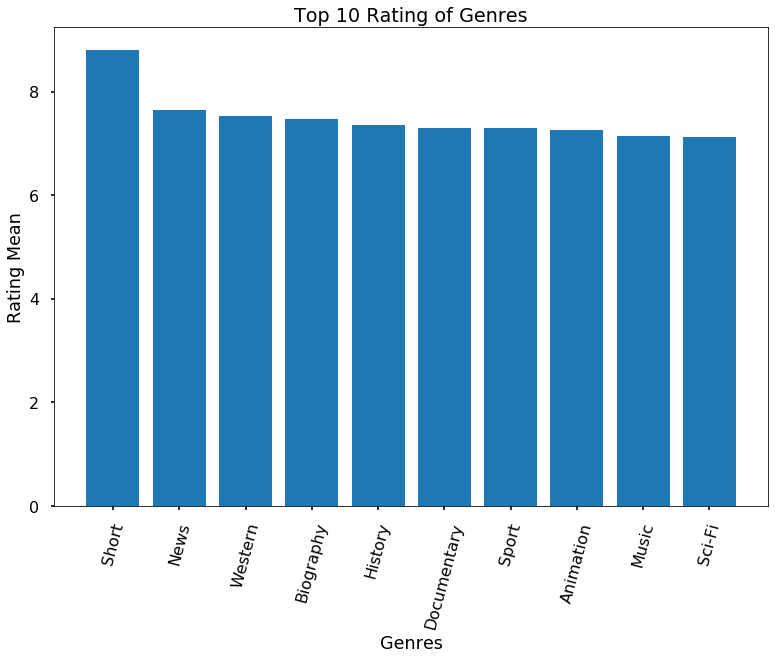

In [81]:
plt.style.use('seaborn-poster')
plt.bar(x=df_mean_rating['genres'][:10], height=df_mean_rating['mean_rating'].head(10))
plt.title('Top 10 Rating of Genres')
plt.xlabel('Genres')
plt.ylabel('Rating Mean')
plt.xticks(rotation=75)
plt.show()

### Best genre in gross(total = domestic+foreign) from bom

In [82]:
#preview the dataset
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [83]:
#update the df with a total gross and count
df_gross['total_gross'] = df_gross['domestic_gross'] + df_gross['foreign_gross']
df_gross['count'] = None
df_gross['count'].fillna(1, inplace=True)
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,count
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,1
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,1
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,1
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,1


In [84]:
df_gengross = df_basics.set_index('primary_title').join(df_gross.set_index('title'), how='inner')
df_gengross.shape

(3161, 12)

In [85]:
df_gengross.reset_index(inplace=True)
df_gengross.drop(columns=['index','level_0', 'genres'], inplace=True)
df_gengross['tconst'].drop_duplicates(inplace=True)

In [86]:
df_gengross.head()

,tconst,original_title,start_year,runtime_minutes,studio,domestic_gross,foreign_gross,year,total_gross,count
0,tt2614684,'71,2014,99.0,RAtt.,1300000.0,355000.0,2015,1655000.0,1
1,tt2353767,Tusen ganger god natt,2013,117.0,FM,53900.0,0.0,2014,53900.0,1
2,tt1179933,10 Cloverfield Lane,2016,103.0,Par.,72100000.0,38100000.0,2016,110200000.0,1
3,tt1715873,10 Years,2011,100.0,Anch.,203000.0,0.0,2012,203000.0,1
4,tt3346824,1001 Gram,2014,93.0,KL,11000.0,0.0,2015,11000.0,1


In [87]:
#There are some duplicated values after join
df_gengross.iloc[:, [1,2,5,6,7,8]].duplicated().sum()

71

In [88]:
df_gengross.drop(df_gengross[df_gengross.iloc[:, [1,2,5,6,7,8]].duplicated()].index, inplace=True)

In [89]:
#df_gengross = df_basics.set_index('original_title').join(df_gross.set_index('title'), how='inner')
#df_gengross.shape
#(2581, 13)
#choose using 'primary_title' to match title bacuse 'primary_title' has more matches

In [90]:
df_gengross.head()

,tconst,original_title,start_year,runtime_minutes,studio,domestic_gross,foreign_gross,year,total_gross,count
0,tt2614684,'71,2014,99.0,RAtt.,1300000.0,355000.0,2015,1655000.0,1
1,tt2353767,Tusen ganger god natt,2013,117.0,FM,53900.0,0.0,2014,53900.0,1
2,tt1179933,10 Cloverfield Lane,2016,103.0,Par.,72100000.0,38100000.0,2016,110200000.0,1
3,tt1715873,10 Years,2011,100.0,Anch.,203000.0,0.0,2012,203000.0,1
4,tt3346824,1001 Gram,2014,93.0,KL,11000.0,0.0,2015,11000.0,1


In [91]:
#Similar as rating part, give an example here to check
df_gengross.set_index('tconst').join(df_genres, how='inner').groupby('Action').sum()

,start_year,runtime_minutes,domestic_gross,foreign_gross,year,total_gross,count,Adult,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
Action,,,,,,,,,,,,,,,,,,,,,
0,4929868,252379.0,5.424807e+10,7.392060e+10,4930437,1.281687e+11,2448,0,216,124,...,5,0,453,52,0,49,0,307,46,16
1,1292996,73885.0,3.801846e+10,6.791736e+10,1293041,1.059358e+11,642,0,226,30,...,0,0,17,84,0,5,0,136,4,5


In [92]:
#Make a mean_totgross function for calculating mean total gross
def mean_totgross(genres):
    return (df_gengross.set_index('tconst').join(df_genres, how='inner').groupby(genres).sum()['total_gross'][1] / 
            df_gengross.set_index('tconst').join(df_genres, how='inner').groupby(genres).sum()['count'][1])

In [93]:
#Make a dictionary to store the genres and total gross, 
#throw an exception that some genres having no movies after inner join
genres = []
totgross = []
for i in df_genres.columns:
    try: 
        totgross.append(mean_totgross(i))
        genres.append(i)
    except:
        print("There is no " + i + " movies after inner join")
dic_gross = {'genres':genres, 'mean_totgross':totgross}

There is no Adult movies after inner join
There is no Game-Show movies after inner join
There is no Reality-TV movies after inner join
There is no Short movies after inner join
There is no Talk-Show movies after inner join


In [94]:
#Dictionary to df and sorting
df_genres_gross = pd.DataFrame.from_dict(dic_gross)
df_genres_gross.sort_values('mean_totgross', ascending=False, inplace=True)

In [95]:
#preview the data
df_genres_gross.head(10)

,genres,mean_totgross
17,Sci-Fi,2.841010e+08
1,Adventure,2.712715e+08
2,Animation,2.531046e+08
0,Action,1.650091e+08
9,Fantasy,1.617202e+08
8,Family,1.070016e+08
4,Comedy,8.340298e+07
19,Thriller,7.703152e+07
18,Sport,7.327638e+07
13,Musical,6.345121e+07


In [96]:
#check the range and double check the above data
check_range(df_gengross['total_gross'])

(100.0, 1405400000.0)

### Visualization

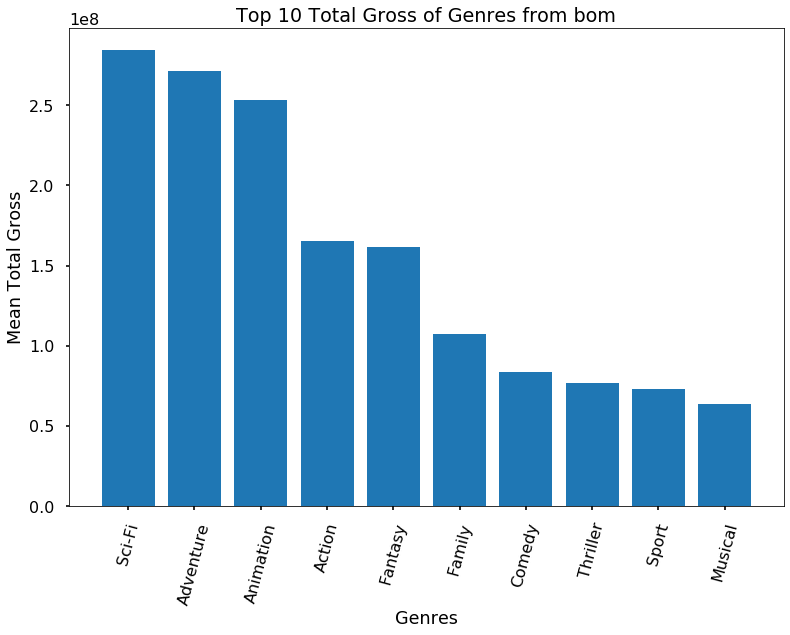

In [97]:
plt.bar(x=df_genres_gross['genres'][:10], height=df_genres_gross['mean_totgross'].head(10))
plt.title('Top 10 Total Gross of Genres from bom')
plt.xlabel('Genres')
plt.ylabel('Mean Total Gross')
plt.xticks(rotation=75)
plt.show()

### Best genre in gross(total = domestic+foreign) from tn

In [98]:
#update the df with a total gross and count
df_budget['total_gross'] = df_budget['domestic_gross'] + df_budget['worldwide_gross']
df_budget['count'] = None
df_budget['count'].fillna(1, inplace=True)
df_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,count
0,2009,Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,1
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,1
2,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,1
3,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1
4,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1


In [99]:
df_gengross2 = df_basics.set_index('primary_title').join(df_budget.set_index('movie'), how='inner')
df_gengross2.shape

(3133, 12)

In [100]:
df_gengross2.reset_index(inplace=True)
df_gengross2.drop(columns=['index','level_0', 'genres'], inplace=True)
df_gengross2['tconst'].drop_duplicates(inplace=True)

In [101]:
df_gengross2.head()

,tconst,original_title,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,count
0,tt3526286,#Horror,2015,101.0,2015,1500000.0,0.0,0.0,0.0,1
1,tt1179933,10 Cloverfield Lane,2016,103.0,2016,5000000.0,72082999.0,108286422.0,180369421.0,1
2,tt3453052,10 Days in a Madhouse,2015,111.0,2015,12000000.0,14616.0,14616.0,29232.0,1
3,tt1413492,12 Strong,2018,130.0,2018,35000000.0,45819713.0,71118378.0,116938091.0,1
4,tt2024544,12 Years a Slave,2013,134.0,2013,20000000.0,56671993.0,181025343.0,237697336.0,1


In [102]:
#There are some duplicated values after join
df_gengross2.iloc[:, [1,2,5,6,7,8]].duplicated().sum()

137

In [103]:
df_gengross2.drop(df_gengross2[df_gengross2.iloc[:, [1,2,5,6,7,8]].duplicated()].index, inplace=True)

In [104]:
df_gengross2.shape

(2996, 10)

In [105]:
#Similar as rating part, give an example here to check
df_gengross2.set_index('tconst').join(df_genres, how='inner').groupby('Action').sum()

,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,count,Adult,Adventure,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
Action,,,,,,,,,,,,,,,,,,,,,
0,4817559,228594.0,4806652,6.332136e+10,8.412859e+10,1.857520e+11,2.698806e+11,2392,0,223,...,5,0,314,95,0,55,0,379,38,12
1,1216496,66081.0,1215311,4.056194e+10,4.313618e+10,1.169694e+11,1.601056e+11,604,0,222,...,0,0,17,105,0,9,0,123,7,6


In [106]:
#Make a mean_totgross function for calculating mean total gross
def mean_totgross2(genres):
    return (df_gengross2.set_index('tconst').join(df_genres, how='inner').groupby(genres).sum()['total_gross'][1] / 
            df_gengross2.set_index('tconst').join(df_genres, how='inner').groupby(genres).sum()['count'][1])

In [107]:
#Make a dictionary to store the genres and total gross, 
#throw an exception that some genres having no movies after inner join
genres = []
totgross = []
for i in df_genres.columns:
    try: 
        totgross.append(mean_totgross2(i))
        genres.append(i)
    except:
        print("There is no " + i + " movies after inner join")
dic_gross = {'genres':genres, 'mean_totgross':totgross}

There is no Adult movies after inner join
There is no Game-Show movies after inner join
There is no Reality-TV movies after inner join
There is no Short movies after inner join
There is no Talk-Show movies after inner join


In [108]:
#Dictionary to df and sorting
df_genres_gross2 = pd.DataFrame.from_dict(dic_gross)
df_genres_gross2.sort_values('mean_totgross', ascending=False, inplace=True)

In [109]:
#preview the data
df_genres_gross2.head(10)

,genres,mean_totgross
2,Animation,4.394062e+08
1,Adventure,3.976234e+08
17,Sci-Fi,3.416897e+08
13,Musical,2.940105e+08
9,Fantasy,2.879725e+08
0,Action,2.650756e+08
8,Family,2.281968e+08
4,Comedy,1.524296e+08
19,Thriller,1.146679e+08
21,Western,1.140367e+08


In [110]:
#check the range and double check the above data
check_range(df_gengross['total_gross'])

(100.0, 1405400000.0)

### Visualization

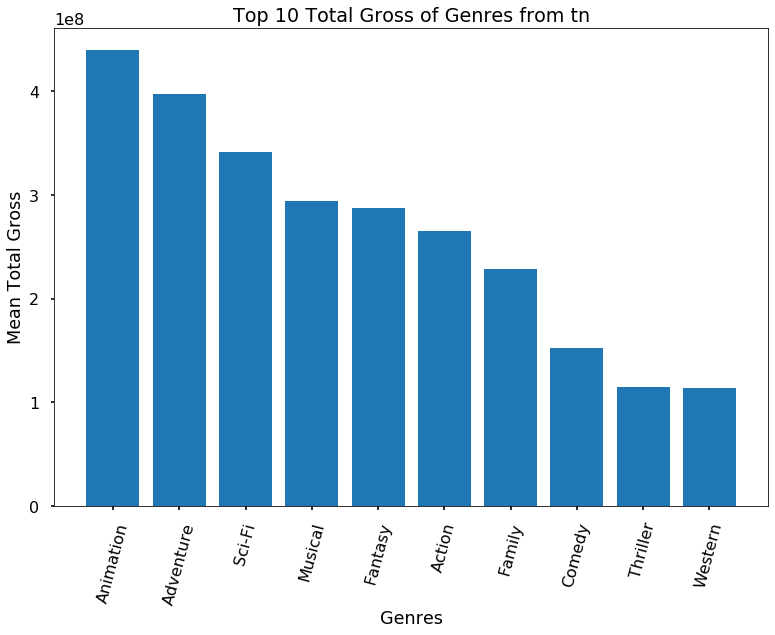

In [111]:
plt.bar(x=df_genres_gross2['genres'][:10], height=df_genres_gross2['mean_totgross'].head(10))
plt.title('Top 10 Total Gross of Genres from tn')
plt.xlabel('Genres')
plt.ylabel('Mean Total Gross')
plt.xticks(rotation=75)
plt.show()


### Subplot

To define the best genre movie, we have two factors, rating and gross. Therefore, I am here to use subplot to comapre them together.

In [112]:
df_mean_rating.set_index('genres', inplace=True)
df_genres_gross.set_index('genres',inplace=True)
df_genres_gross2.set_index('genres', inplace=True)                         

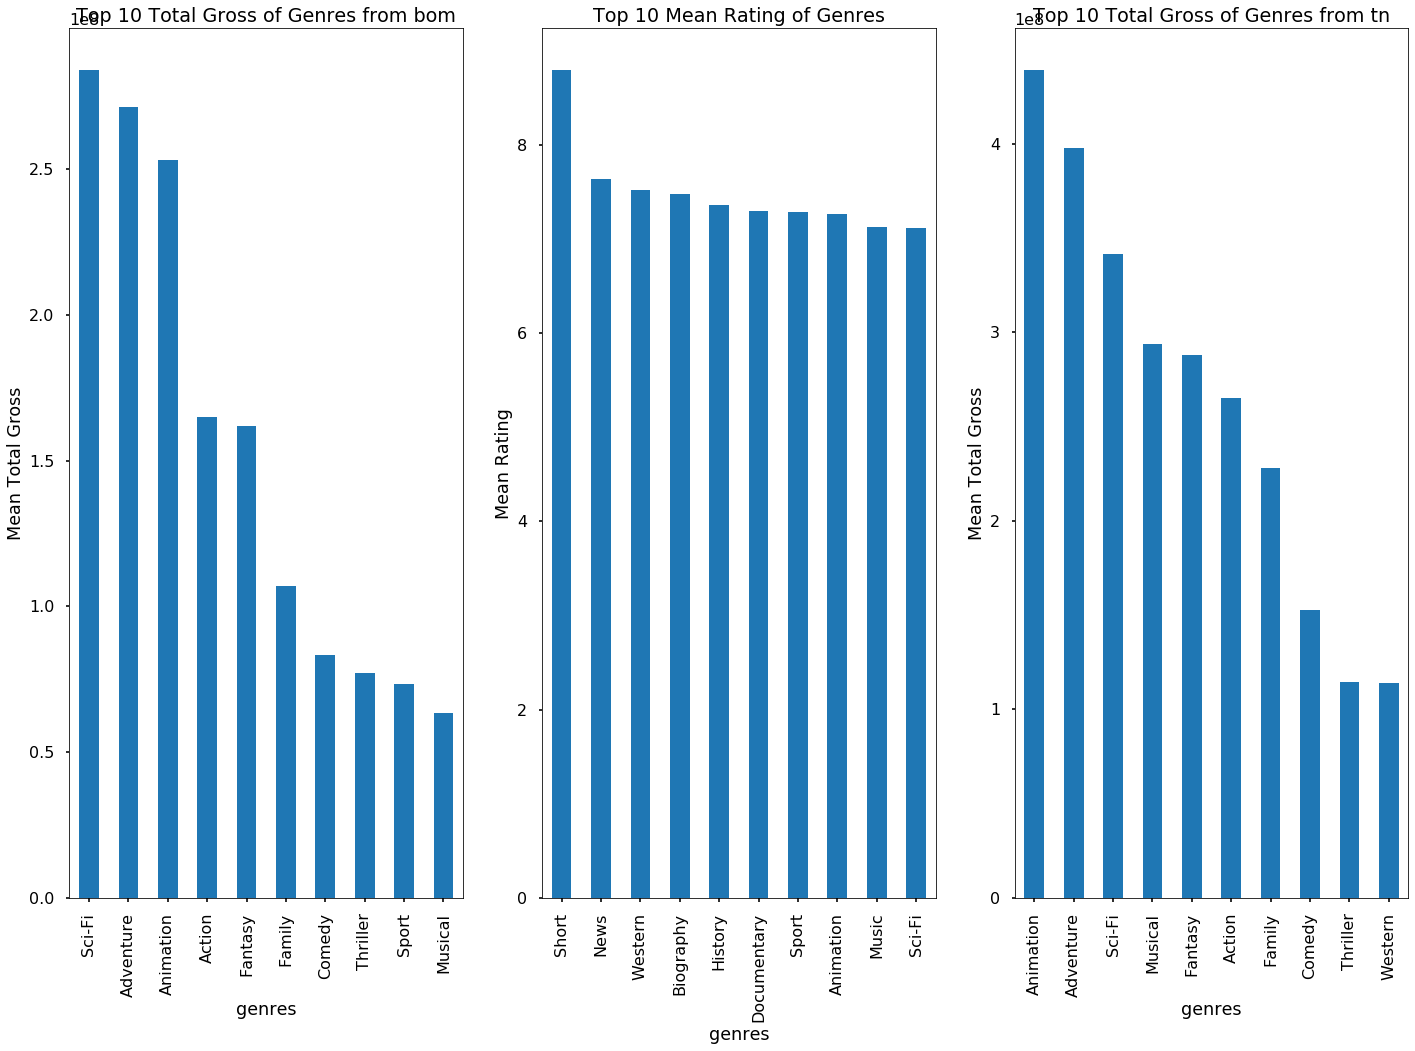

In [113]:
#Make a subplot
fig, (ax1, ax2, ax3) =  plt.subplots(ncols=3, nrows=1, figsize=(24,16)) 
#ax1 for 'Top 10 Total Gross of Genres from bom'
df_genres_gross['mean_totgross'].head(10).plot.bar(ax=ax1)
ax1.set_title('Top 10 Total Gross of Genres from bom')
ax1.set_ylabel('Mean Total Gross')
#ax2 for 'Top 10 Mean Rating of Genres'
df_mean_rating['mean_rating'].head(10).plot.bar(ax=ax2)
ax2.set_title('Top 10 Mean Rating of Genres')
ax2.set_ylabel('Mean Rating')
#ax3 for 'Top 10 Total Gross of Genres from tn'
df_genres_gross2['mean_totgross'].head(10).plot.bar(ax=ax3)
ax3.set_title('Top 10 Total Gross of Genres from tn')
ax3.set_ylabel('Mean Total Gross')
plt.show()

## Gross vs. Budget

In [114]:
df_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,count
0,2009,Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,1
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,1
2,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,1
3,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1
4,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1


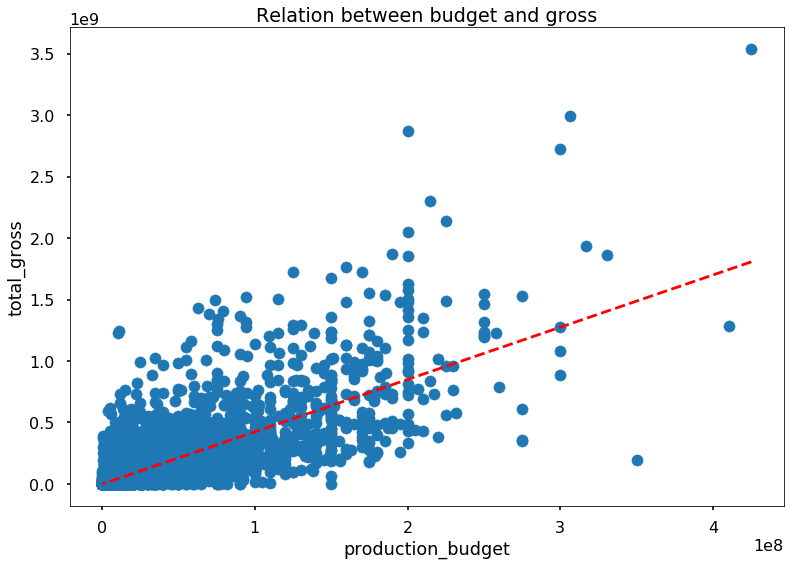

In [115]:
plt.scatter(x=df_budget['production_budget'], y=df_budget['total_gross'])
plt.title('Relation between budget and gross')
plt.xlabel('production_budget')
plt.ylabel('total_gross')
z = np.polyfit(x=df_budget['production_budget'], y=df_budget['total_gross'],deg=1)
p = np.poly1d(z)
plt.plot(df_budget['production_budget'],p(df_budget['production_budget']),"r--")
plt.show()

In [116]:
np.corrcoef(x=df_budget['production_budget'], y=df_budget['total_gross'])

array([[1.        , 0.74196702],
       [0.74196702, 1.        ]])

### corrcoef for each genres

In [117]:
#review the join table between budget and basics, will the column tconst to join with genres
df_gengross2.head()

,tconst,original_title,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,count
0,tt3526286,#Horror,2015,101.0,2015,1500000.0,0.0,0.0,0.0,1
1,tt1179933,10 Cloverfield Lane,2016,103.0,2016,5000000.0,72082999.0,108286422.0,180369421.0,1
2,tt3453052,10 Days in a Madhouse,2015,111.0,2015,12000000.0,14616.0,14616.0,29232.0,1
3,tt1413492,12 Strong,2018,130.0,2018,35000000.0,45819713.0,71118378.0,116938091.0,1
4,tt2024544,12 Years a Slave,2013,134.0,2013,20000000.0,56671993.0,181025343.0,237697336.0,1


In [118]:
df_gengross2.set_index('tconst', inplace=True)

In [119]:
def find_corr(genres):
    df_corr = df_gengross2.join(df_genres, how='inner').loc[
        df_gengross2.join(df_genres, how='inner')[genres] == 1]
    return np.corrcoef(x=df_corr['production_budget'], y=df_corr['total_gross'])[0][1]

In [120]:
#Make a dictionary to store the genres and corr, 
#throw an exception that some genres having no movies after inner join
genres = []
corr = []
#ignore the warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    for i in df_genres.columns:
        try: 
            corr.append(find_corr(i))
            genres.append(i)
        except:
            print("There is no " + i + " movies after inner join")
dic_corr = {'genres':genres, 'corr':corr}

In [121]:
#Dictionary to df and sorting
df_corr = pd.DataFrame.from_dict(dic_corr)
df_corr.sort_values('corr', ascending=False, inplace=True)

In [122]:
df_corr.head(10)

,genres,corr
17,News,0.928002
15,Musical,0.901655
20,Sci-Fi,0.786880
13,Horror,0.785489
25,War,0.777547
6,Crime,0.773461
24,Thriller,0.767988
0,Action,0.762663
7,Documentary,0.759246
22,Sport,0.755763


In [123]:
df_corr.loc[df_corr['genres']=='Animation']

,genres,corr
3,Animation,0.692486


### Visualization

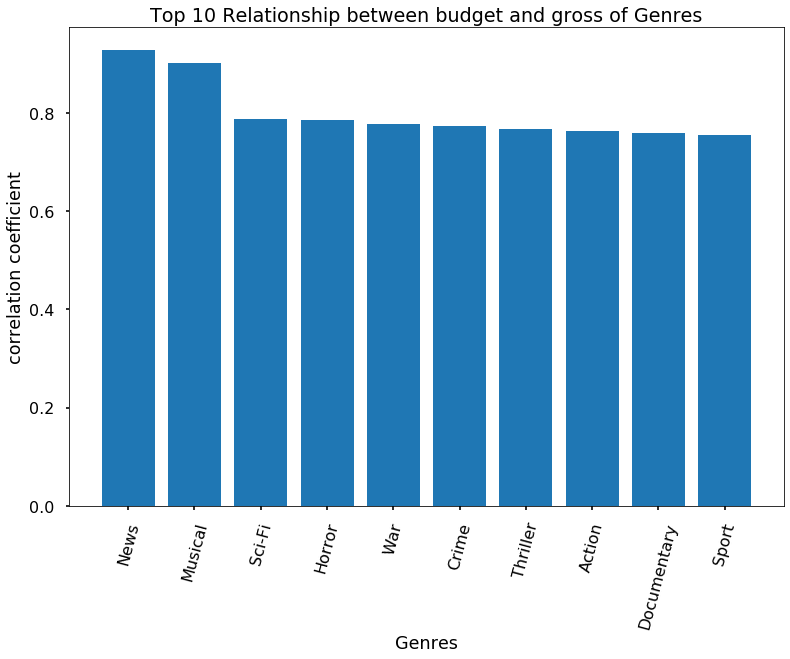

In [124]:
plt.bar(x=df_corr['genres'][:10], height=df_corr['corr'].head(10))
plt.title('Top 10 Relationship between budget and gross of Genres')
plt.xlabel('Genres')
plt.ylabel('correlation coefficient')
plt.xticks(rotation=75)
plt.show()

### Which genre has the highest revenue(revenue = total gross - budget)?

In [125]:
df_gengross2.head()

,original_title,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,count
tconst,,,,,,,,,
tt3526286,#Horror,2015,101.0,2015,1500000.0,0.0,0.0,0.0,1
tt1179933,10 Cloverfield Lane,2016,103.0,2016,5000000.0,72082999.0,108286422.0,180369421.0,1
tt3453052,10 Days in a Madhouse,2015,111.0,2015,12000000.0,14616.0,14616.0,29232.0,1
tt1413492,12 Strong,2018,130.0,2018,35000000.0,45819713.0,71118378.0,116938091.0,1
tt2024544,12 Years a Slave,2013,134.0,2013,20000000.0,56671993.0,181025343.0,237697336.0,1


In [126]:
#Update the df with revenue = total gross - budget
df_gengross2['revenue'] = df_gengross2['total_gross'] - df_gengross2['production_budget']
check_range(df_gengross2['revenue'])

(-157475300.0, 3111852904.0)

In [127]:
df_gengross2.iloc[:,[0,4,7]].duplicated().sum() / df_gengross2.shape[0]

0.1972630173564753

In [128]:
#Drop some duplicate after joinning beacause we join here using title
df_gengross2.drop(df_gengross2[df_gengross2.iloc[:, [0,4,7]].duplicated()].index, inplace=True)

In [129]:
#Top 10 out of pocket movie...lol
df_gengross2.sort_values('revenue').head(10)

,original_title,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,count,revenue
tconst,,,,,,,,,,
tt6565702,Dark Phoenix,2019,113.0,2019,350000000.0,42762350.0,149762350.0,192524700.0,1,-157475300.0
tt2283336,Men in Black: International,2019,115.0,2019,110000000.0,3100000.0,3100000.0,6200000.0,1,-103800000.0
tt5519340,Bright,2017,117.0,2017,90000000.0,0.0,0.0,0.0,1,-90000000.0
tt1305591,Mars Needs Moms,2011,88.0,2011,150000000.0,21392758.0,39549758.0,60942516.0,1,-89057484.0
tt7232438,Puen Tee Raluek,2017,114.0,2017,90000000.0,8224288.0,10551417.0,18775705.0,1,-71224295.0
tt4776998,The Promise,2016,133.0,2017,90000000.0,8224288.0,10551417.0,18775705.0,1,-71224295.0
tt1041804,The Nutcracker in 3D,2010,110.0,2010,90000000.0,195459.0,20466016.0,20661475.0,1,-69338525.0
tt4743226,Da hong zha,2018,120.0,2018,65000000.0,0.0,516279.0,516279.0,1,-64483721.0
tt2479478,The Ridiculous 6,2015,119.0,2015,60000000.0,0.0,0.0,0.0,1,-60000000.0


In [130]:
#Example
df_gengross2.join(df_genres, how='inner').groupby('Action').sum()

,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,count,revenue,Adult,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
Action,,,,,,,,,,,,,,,,,,,,,
0,3759559,184363.0,3752317,4.862265e+10,6.610608e+10,1.470153e+11,2.131214e+11,1867,1.644988e+11,0,...,1,0,273,83,0,40,0,291,34,9
1,1083479,59203.0,1082646,3.791314e+10,4.102741e+10,1.120276e+11,1.530550e+11,538,1.151419e+11,0,...,0,0,17,95,0,7,0,107,6,6


In [131]:
def find_revebudget(genres):
    df = df_gengross2.join(df_genres, how='inner').groupby(genres).sum()
    return (df['revenue'][1] / df['count'][1], df['production_budget'][1] / df['count'][1])

In [132]:
#Make a dictionary to store the genres and revenue, 
#throw an exception that some genres having no movies after inner join
genres = []
revenue = []
budget = [] 
#ignore the warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    for i in df_genres.columns:
        try: 
            revenue.append(find_revebudget(i)[0])
            budget.append(find_revebudget(i)[1])
            genres.append(i)
        except:
            print("There is no " + i + " movies after inner join")
dic_revebudget = {'genres':genres, 'revenue':revenue, 'budget': budget}

There is no Adult movies after inner join
There is no Game-Show movies after inner join
There is no Reality-TV movies after inner join
There is no Short movies after inner join
There is no Talk-Show movies after inner join


In [133]:
#Dictionary to df and sorting
df_revenue = pd.DataFrame.from_dict(dic_revebudget)
df_revenue.sort_values('revenue', ascending=False, inplace=True)

In [134]:
df_revenue.head(10)

,genres,revenue,budget
2,Animation,3.429938e+08,8.653679e+07
1,Adventure,3.163703e+08,9.395289e+07
17,Sci-Fi,2.857869e+08,7.390868e+07
9,Fantasy,2.153605e+08,7.650267e+07
0,Action,2.140184e+08,7.047052e+07
13,Musical,1.953371e+08,4.279333e+07
8,Family,1.761249e+08,5.398112e+07
4,Comedy,1.231741e+08,3.497973e+07
19,Thriller,9.073795e+07,2.775505e+07
14,Mystery,8.613043e+07,2.188758e+07


### Visualization

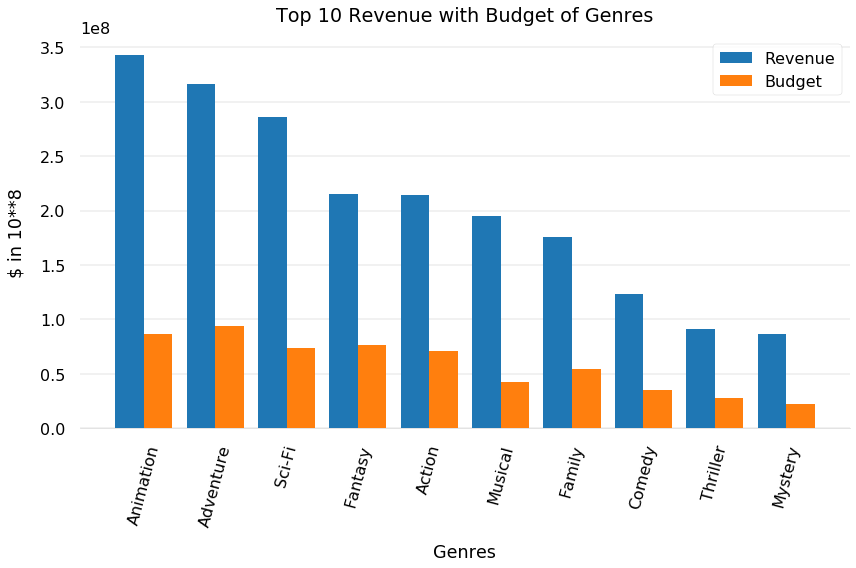

In [135]:
# Create a grouped bar chart with size
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(10)

# Define bar width. We need this to offset the second bar.
bar_width = 0.4

#Define two bars and the second need the offset space
b1 = ax.bar(x, height=df_revenue['revenue'].head(10),
            width=bar_width, label='Revenue')
b2 = ax.bar(x + bar_width, height=df_revenue['budget'].head(10),
            width=bar_width, label='Budget')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(df_revenue['genres'][:10])

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Genres', labelpad=15)
ax.set_ylabel('$ in 10**8', labelpad=15)
ax.set_title('Top 10 Revenue with Budget of Genres', pad=15)
plt.xticks(rotation=75)
fig.tight_layout()

## Best Runtime

### Runtime vs Rating

In [136]:
df_basics.set_index('tconst', inplace=True)

In [137]:
df_ratings.head()

,averagerating,numvotes,total_rating,count
tconst,,,,
tt10356526,8.3,31,257.3,1
tt10384606,8.9,559,4975.1,1
tt1042974,6.4,20,128.0,1
tt1043726,4.2,50352,211478.4,1
tt1060240,6.5,21,136.5,1


In [138]:
df_runtrating = df_basics.join(df_ratings, how='inner')
df_runtrating.head()

,index,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,total_rating,count
tconst,,,,,,,,,,
tt0063540,0,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77,539.0,1
tt0066787,1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",7.2,43,309.6,1
tt0069049,2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517,31167.3,1
tt0100275,4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",6.5,119,773.5,1
tt0137204,7,Joe Finds Grace,Joe Finds Grace,2017,83.0,"[Adventure, Animation, Comedy]",8.1,263,2130.3,1


In [139]:
#Find corr
np.corrcoef(x=df_runtrating['runtime_minutes'], y=df_runtrating['averagerating'])

array([[ 1.        , -0.03639087],
       [-0.03639087,  1.        ]])

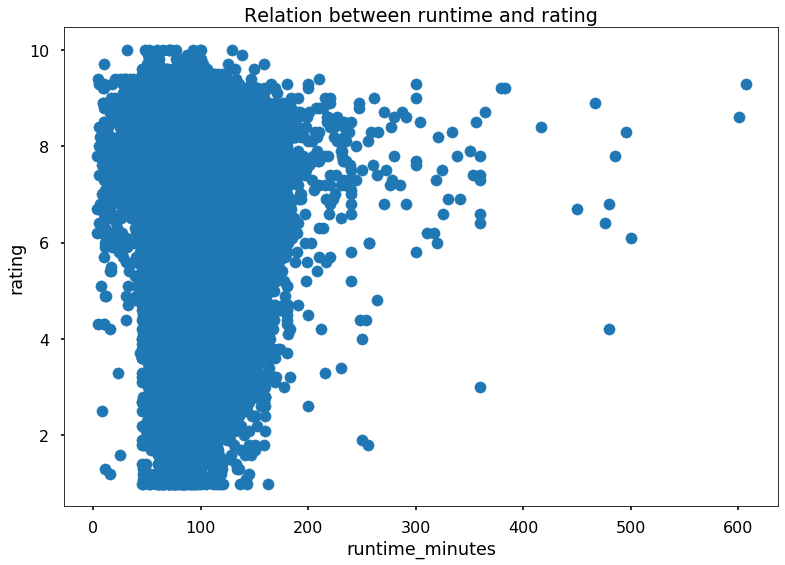

In [140]:
plt.scatter(x=df_runtrating['runtime_minutes'], y=df_runtrating['averagerating'])
plt.title('Relation between runtime and rating')
plt.xlabel('runtime_minutes')
plt.ylabel('rating')
plt.show()

### Runtime vs Revenue

In [141]:
df_gengross2.head()

,original_title,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,count,revenue
tconst,,,,,,,,,,
tt3526286,#Horror,2015,101.0,2015,1500000.0,0.0,0.0,0.0,1,-1500000.0
tt1179933,10 Cloverfield Lane,2016,103.0,2016,5000000.0,72082999.0,108286422.0,180369421.0,1,175369421.0
tt3453052,10 Days in a Madhouse,2015,111.0,2015,12000000.0,14616.0,14616.0,29232.0,1,-11970768.0
tt1413492,12 Strong,2018,130.0,2018,35000000.0,45819713.0,71118378.0,116938091.0,1,81938091.0
tt2024544,12 Years a Slave,2013,134.0,2013,20000000.0,56671993.0,181025343.0,237697336.0,1,217697336.0


In [142]:
np.corrcoef(x=df_gengross2['runtime_minutes'], y=df_gengross2['revenue'])

array([[1.        , 0.20019927],
       [0.20019927, 1.        ]])

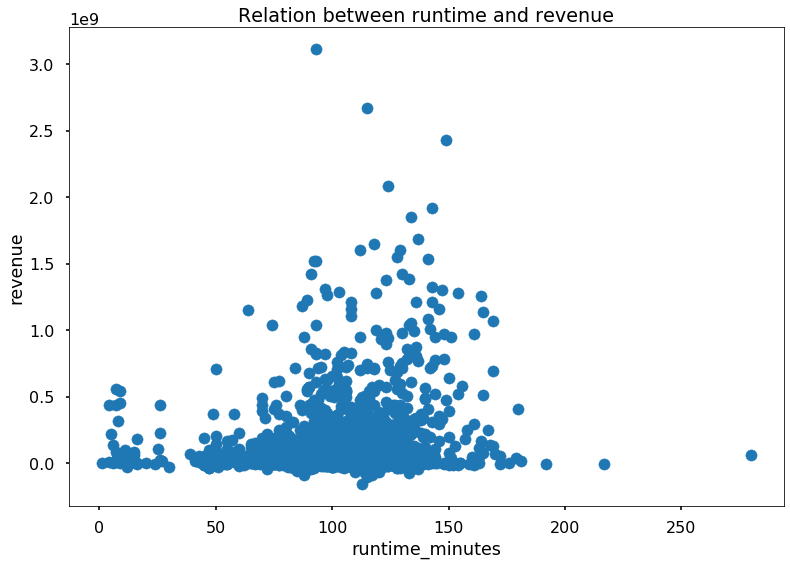

In [143]:
plt.scatter(x=df_gengross2['runtime_minutes'], y=df_gengross2['revenue'])
plt.title('Relation between runtime and revenue')
plt.xlabel('runtime_minutes')
plt.ylabel('revenue')
plt.show()

In [144]:
#Find TOP 500 to decide which range is most common

In [145]:
df_runtrating.sort_values('averagerating', ascending=False, inplace=True)
df_runtrating.head()

,index,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,total_rating,count
tconst,,,,,,,,,,
tt4960818,85712,Revolution Food,Revolution Food,2015,70.0,[Documentary],10.0,8,80.0,1
tt8730716,136750,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,[Documentary],10.0,5,50.0,1
tt10176328,1857,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,[Documentary],10.0,5,50.0,1
tt7259300,120584,Calamity Kevin,Calamity Kevin,2019,77.0,"[Adventure, Comedy]",10.0,6,60.0,1
tt4109192,71954,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,[Documentary],10.0,6,60.0,1


In [146]:
check_range(df_runtrating['runtime_minutes'][:500])

(4.0, 607.0)

In [147]:
df_gengross2.sort_values('revenue', ascending=False, inplace=True)
df_gengross2.head()

,original_title,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,count,revenue
tconst,,,,,,,,,,
tt1775309,Abatâ,2011,93.0,2009,425000000.0,760507625.0,2.776345e+09,3.536853e+09,1,3.111853e+09
tt8852130,Titanic,2018,115.0,1997,200000000.0,659363944.0,2.208208e+09,2.867572e+09,1,2.667572e+09
tt4154756,Avengers: Infinity War,2018,149.0,2018,300000000.0,678815482.0,2.048134e+09,2.726950e+09,1,2.426950e+09
tt0369610,Jurassic World,2015,124.0,2015,215000000.0,652270625.0,1.648855e+09,2.301125e+09,1,2.086125e+09
tt0848228,The Avengers,2012,143.0,2012,225000000.0,623279547.0,1.517936e+09,2.141215e+09,1,1.916215e+09


In [148]:
check_range(df_runtrating['runtime_minutes'][:500])

(4.0, 607.0)

In [149]:
check_range(df_gengross2['runtime_minutes'][:500])

(4.0, 180.0)

In [150]:
a = np.arange(0,610,20)
str_key = [str(x) +' to ' + str(x+20) for x in a]

In [151]:
dic_runtrating = {}
for i in a:
    dic_runtrating.setdefault(i,[0,0])

In [152]:
for i in range(500):
    for n in dic_runtrating.keys():
        if df_runtrating['runtime_minutes'][i] in range(n,n+20):
            dic_runtrating[n][0] += 1
        if df_gengross2['runtime_minutes'][i] in range(n,n+20):
            dic_runtrating[n][1] += 1

In [153]:
dic_runtime = {}
dic_runtime = {'runtime_range': str_key, 'rating': [dic_runtrating[i][0] for i in dic_runtrating.keys()],
              'revenue': [dic_runtrating[i][1] for i in dic_runtrating.keys()]}

In [154]:
df_runtime = pd.DataFrame.from_dict(dic_runtime)
#df_runtime

In [155]:
#drop outliners
df_runtime = df_runtime.loc[:10,]

In [156]:
df_runtime

,runtime_range,rating,revenue
0,0 to 20,7,8
1,20 to 40,13,2
2,40 to 60,100,7
3,60 to 80,114,19
4,80 to 100,163,122
5,100 to 120,64,184
6,120 to 140,22,111
7,140 to 160,8,37
8,160 to 180,3,9
9,180 to 200,1,1


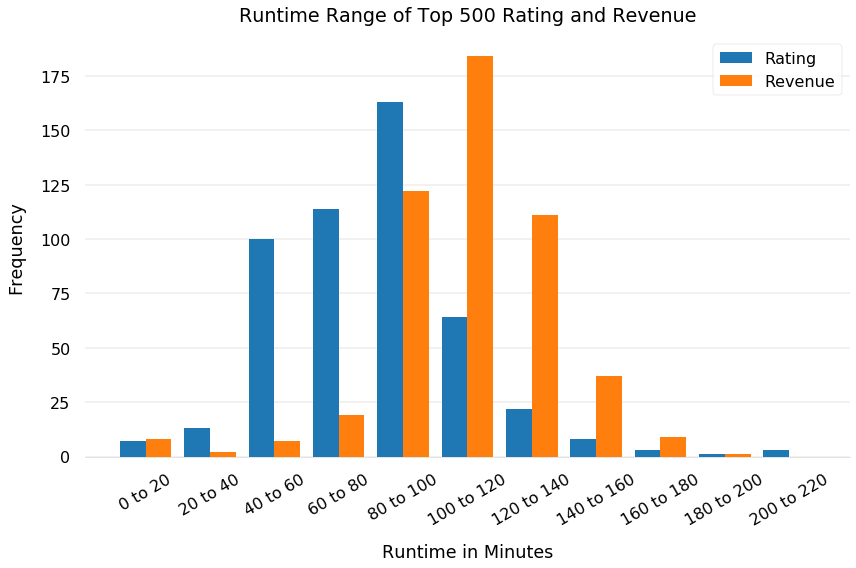

In [157]:
# Create a grouped bar chart with size
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(11)

# Define bar width. We need this to offset the second bar.
bar_width = 0.4

#Define two bars and the second need the offset space
b1 = ax.bar(x, height=df_runtime['rating'], width=bar_width, label='Rating')
b2 = ax.bar(x + bar_width, height=df_runtime['revenue'], width=bar_width, label='Revenue')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(df_runtime['runtime_range'])

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Runtime in Minutes', labelpad=15)
ax.set_ylabel('Frequency', labelpad=15)
ax.set_title('Runtime Range of Top 500 Rating and Revenue', pad=15)
plt.xticks(rotation=30)
fig.tight_layout()